# Assignment 1

First we need to import the required modules

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Zagovor

Na optional je vecji fokus.
Svoje slike, interpretiras histograme, velik 0 ce je velik crnih
Omeji range na y, skaliraj, plt.ylin


In [2]:
## CE ZGUBIS CODEBLOCK CTRL+Y !!!!

## Vaje

#Indexiranje
# a = np.arange(10)


# print(a[3::1])
# print(a[2:8:2])

# [x**2 if x%2==0 else x for x in a]

# # Numpy
# a = np.array([[1,2],[3,4]])
# print(a)

# print(a.shape, a.dtype) # (2,2) int32

# z = np.zeros((2,5)) # creates a new array of zeros
# c = np.ones_like(z) # creates an array of ones the size of z (equivalent to np.ones(z.shape))

# print(c)

# plt.imshow(I[...,0])
#isto kt I[:,:,0] 
    # vse vrstice, vse stolpce, 0-ti kanal

#plt.subplot(2 , 2, 3) #- naslovis levi kvadratek spodi

#mas sivinsko sliko, hoces jo dat kot RGB -> na vse tri kanale das isto
#zakaj bi kako drgac? ce hoces bol podobno cloveskem ocesu, prioritizira zeleno ali  za globinsko sliko

#a = np.random.randint(0, 100, (5,7))
#mask = a%2==0
#print(a[mask])
#print(a*mask)
#np.where(a%13==0, True, False)

#I[100:200,300:400] = 255- I[100:200,300:400]

#vaje kako barchart
#h=rand
#plt.bar(np.arange(100),h)



#split into channels
# img = cv2.imread("image.jpg")
# b = img[:,:,0]
# g = img[:,:,1]
# r = img[:,:,2]
#ALI
#r,b,g = cv2.split(image)

#test = np.arange(10)
#print(test[1:4], test[::-1][:3])

#kako narest vecje subplote
#                               [width, height]
#plt.rcParams['figure.figsize'] = [15, 15]

## 1.a) Displaying the image
Now we can show our first image. 

imread() function will have the channels stored in BGR (Blue, Green and Red) order by default, so we need to change to RGB

imread() saves as a 3d np.array, (3 * 2d arrayi vsak predstavlaja value za pixel za posamezen R G B)

(360, 640, 3)


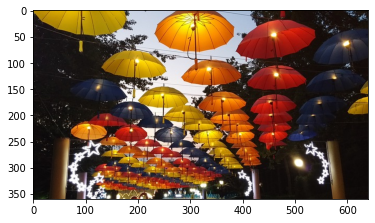

In [3]:
image = cv2.imread('images/umbrellas.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
plt.imshow(image)
plt.show()

## Displaying only one color channel

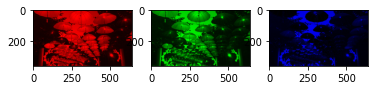

In [4]:
imgSplit = np.copy(image)


r,g,b = cv2.split(imgSplit)

plt.subplot(1,3,1)
#show only red
imgStack = np.dstack((r,g*0,b*0))
plt.imshow(imgStack)

plt.subplot(1,3,2)
#show only green
imgStack = np.dstack((r*0,g,b*0))
plt.imshow(imgStack)

plt.subplot(1,3,3)
#show only blue
imgStack = np.dstack((r*0,g*0,b))
plt.imshow(imgStack)

## 1.b) Converting the image to grayscale
A simple way of doing this is summing the color channels and dividing the dresult by 3, "averaging" the values. However the sum can reach beyond the np.unit8 range (which is the type the image loads [0,255]). We can convert them to floats

Another approach is to use the builtin function to convert to grayscale. 

Če uporabm cv2.imshow
`grayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) cv2.imshow('GrayScale image', grayScaleImage)`. To dela okej, ampak plt.imshow uporabla default coloromap *virdis*, zato ce uporablas plt rabs specificirat kateri colormap uporablas, in normalizacijo ce je pomembna `plt.imshow(img, cmap="gray", vmin=0, vmax=255)`

## Numpy axes

To lahko razmislas kot osi v koordinatnem sistemu

mas 2d tabelo, *axis 0* gre navzdol $\downarrow$, *axis 1* pa desno $\rightarrow$

ce mas 3d tko kt pri imread, si to predstavlas kot 3 2d tabele "druga na drugi", za R G B

axis 2 je tretji axis in gre v 3d po teh treh 2d tabelah ("das 3 tabele eno na drugo, ta dimenzija "po diagonali v prostoru" je axis 2)


(360, 640, 3)


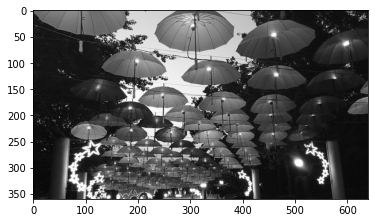

In [5]:
print(image.shape)

#tole je ekvivalentno, average ma se optional weight parameter
avgd = np.average(image, axis=2)
avgd = np.mean(image, axis=2)

plt.imshow(avgd, cmap="gray")

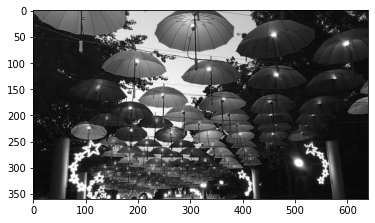

In [6]:
grayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayScaleImage, cmap="gray")
plt.show()
#cv2.imshow('GrayScale image', grayScaleImage) to tudi dela, ampak cv2.imshow crasha jupyter

## 1.c) Cut a part of the image
We can get only a portion of the image by using **indexing**. You can extract only one channel.




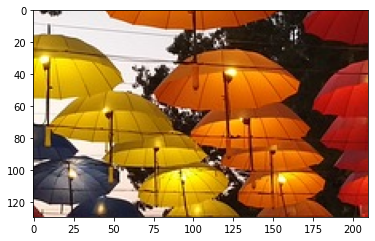

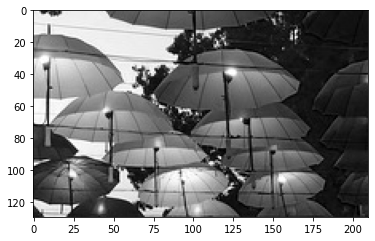

In [7]:
cutout=image[130:260, 240:450]
plt.imshow(cutout)
plt.show()

#extracting only one of the channels, una enka nakonc je axis 2
cutoutGrayscale=image[130:260, 240:450, 1]
plt.imshow(cutoutGrayscale, cmap='gray')
plt.show()

If we want to copy data we use the copy() function. `ImageCopy = np.copy(Image)`. ImageCopy = Image samo kopira referenco na podatke

## 1.d) Inverting part of an image
inverse = 255-image

### Z indexiranjem in for loopom

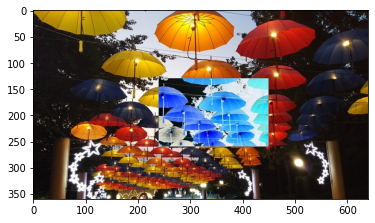

In [8]:
partInverted = np.copy(image)

partInverted[130:260, 240:450] = 255-partInverted[130:260, 240:450]
#partInverted[130:260, 240:450, :] = 255-partInverted[130:260, 240:450, :]

plt.imshow(partInverted)


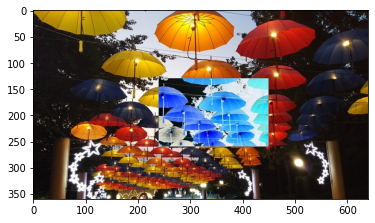

In [9]:
#inverts all pixels in the specified range
def invertPartOfImage(image, yStart, yEnd, xStart, xEnd):
    for y in range(yStart, yEnd):
        for x in range(xStart, xEnd):
            image[y,x] = 255- image[y,x]


partInverted = np.copy(image)
invertPartOfImage(partInverted, 130, 260, 240, 450)
plt.imshow(partInverted)

## 1.e) Grayscale levels reduction 

To reduce to N colors divide by k=256/N




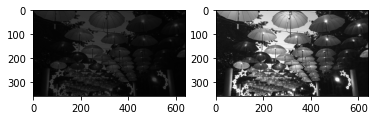

In [10]:
copy = np.copy(image)
gray = cv2.cvtColor(copy,cv2.COLOR_RGB2GRAY)
imageFloat = gray.astype(float)

# N = Number of colors
N=64
k=256/N

reduced = (imageFloat /  k)

reduced = reduced.astype(np.uint8)

plt.subplot(1, 2, 1)
#vmax=255 da preprecis, da imshow sam scala da zavzamejo cel uint8 interval, drgac zgledata isto
plt.imshow(reduced, cmap="gray", vmax=255)

plt.subplot(1,2,2)
plt.imshow(gray, cmap="gray")

plt.show()

# Tresholding and histograms

## 2.a) Binary mask from a grayscale image

In [11]:
I = cv2.imread('images/bird.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

We can change the values with numpy indexing (ne vem ce se temu tko rece), or np.where(condition, x, y). If the
condition holds, the value will be replaced by x, otherwise by y.

### read numpy indexing

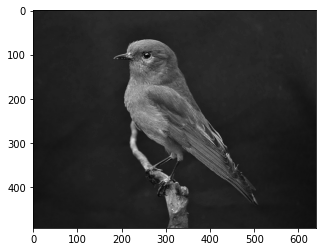

In [12]:
threshold = 47

#copy the bird image and make it a grayscale
birdImage = np.copy(I)
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_RGB2GRAY)

plt.imshow(birdImage, cmap='gray')
plt.show()

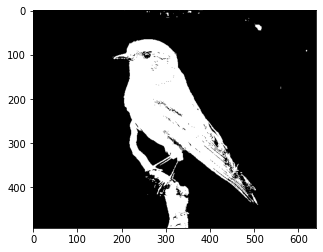

In [13]:
#change the values above and below the treshold
birdImage[birdImage<threshold]=0
birdImage[birdImage>=threshold]=1

plt.imshow(birdImage, cmap='gray')


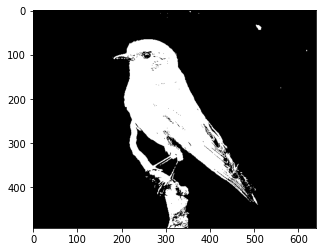

In [14]:
birdImage = np.copy(I)
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_BGR2GRAY)

#with np.where function
birdImage = np.where(birdImage < threshold, 0, 1)

plt.imshow(birdImage, cmap='gray')  


## 2.b) Histograms
Normaliziramo histogram, da dobimo verjetnostno porazdelitev, velikost stolpca predstavlja verjetnost da nek pixel spada v ta bin. Ce normaliziramo lahko lazje primerjamo slike razlicnih velikosti


(492, 640, 3) (492, 640)
314880


(array([5.32940e+04, 2.17505e+05, 9.02000e+03, 1.41300e+04, 1.26020e+04,
        5.90800e+03, 1.78600e+03, 5.15000e+02, 1.01000e+02, 1.90000e+01]),
 array([  0. ,  25.3,  50.6,  75.9, 101.2, 126.5, 151.8, 177.1, 202.4,
        227.7, 253. ]),
 <BarContainer object of 10 artists>)

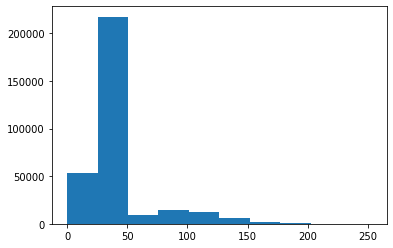

In [15]:

#builtin
bins = 10
binSize = 255 // bins

birdImage = np.copy(I)
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_BGR2GRAY)

print(I.shape, birdImage.shape)


#reshape to unroll the image into a 1d vector
unrolled = birdImage.reshape(-1)
print(len(unrolled))


#plt.hist(unrolled, density=True, bins=bins)
plt.hist(unrolled, bins=10)




[ 12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216
 228 240]


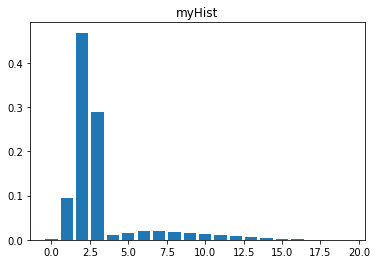

range(0, 20) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [16]:
def myhist(image, bins):
    binSize = 255 // bins

    newHist = np.zeros(bins)
    cumSum = np.cumsum([binSize] * bins) #to loh naprintas da ves v kjere buckete gre kaksna vrednost
    print(cumSum)

    image = np.copy(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    #reshape to unroll the image into a 1d vector
    unrolled = image.reshape(-1)

    #plt.hist(unrolled, cumSum)

    #koda za sestavt histogram
    for pixel in unrolled:
        histIndex = pixel // binSize
        if (histIndex >= bins):
            histIndex = bins - 1
        newHist[histIndex] += 1

    #normaliziramo sum(newHist) == len(unrolled)
    newHist = newHist / sum(newHist)

    return newHist


bins = 20
newHist = myhist(I,bins)
plt.title("myHist")
plt.bar(range(bins), newHist)
plt.show()

print(range(bins), np.arange(bins))




## 2.c) modify Myhist

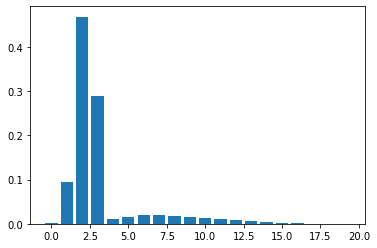

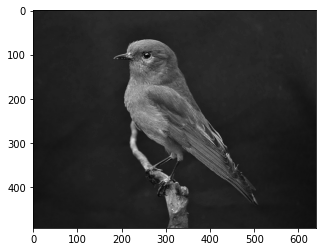

In [17]:
def myhist2(image, bins):
    image = np.copy(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    unrolled = image.reshape(-1)
    minValue = unrolled.min()
    maxValue = unrolled.max()

    binSize = (maxValue - minValue) // bins
    newHist = np.zeros(bins)


    #koda za sestavt histogram, PAZI, kle mors odstet offset min
    unrolled = unrolled - minValue

    for pixel in unrolled:
        histIndex = pixel // binSize
        if (histIndex >= bins):
            histIndex = bins - 1
        newHist[histIndex] += 1

    #normaliziramo sum(newHist) == len(unrolled)
    newHist = newHist / len(unrolled)

    return newHist


bins = 20
newHist = myhist2(I,bins)
plt.bar(np.arange(bins), newHist)
plt.show()

#print(range(bins), np.arange(bins))

#primerjava myHist vs builtin hist
birdImage = np.copy(I)
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_RGB2GRAY)


plt.imshow(birdImage, cmap="gray")

#sanitycheck 
# darkParts = birdImage <= 12
# print(np.count_nonzero(darkParts))
# birdImage = np.where(birdImage > 12, 0, 1)
# print(np.count_nonzero(birdImage), birdImage.shape)

plt.imshow(birdImage, cmap="gray")


## Kako pokazat plote en zravn druzga

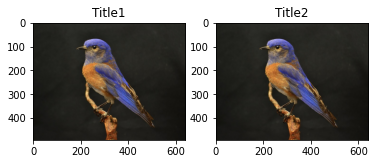

In [18]:
plt.subplot(1, 2, 1) #1 vrstica, 2 stolpca, 1 pomeni da dajem zdaj sliko na prvo mesto
plt.title("Title1")
plt.imshow(I)

plt.subplot(1, 2, 2)
plt.title("Title2")
plt.imshow(I)
plt.show()

## 2.d) My images

[ 12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216
 228 240]
[ 12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216
 228 240]
[ 12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204 216
 228 240]


<BarContainer object of 20 artists>

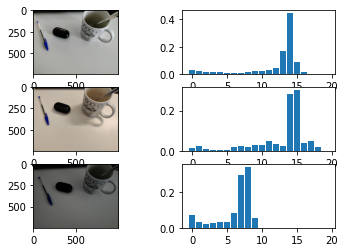

In [19]:
myimg1 = cv2.imread("images\myI1.jpg")
myimg2 = cv2.imread("images/myI2.jpg")
myimg3 = cv2.imread("images/myI3.jpg")

myimg1 = cv2.cvtColor(myimg1, cv2.COLOR_BGR2RGB)
myimg2 = cv2.cvtColor(myimg2, cv2.COLOR_BGR2RGB)
myimg3 = cv2.cvtColor(myimg3, cv2.COLOR_BGR2RGB)

bins = 20
newHist = myhist(myimg1,bins)

plt.subplot(3,2,1)
plt.imshow(myimg1, cmap="gray")
plt.subplot(3,2,2)
plt.bar(range(bins), newHist)

newHist = myhist(myimg2,bins)
plt.subplot(3,2,3)
plt.imshow(myimg2, cmap="gray")
plt.subplot(3,2,4)
plt.bar(range(bins), newHist)

newHist = myhist(myimg3,bins)
plt.subplot(3,2,5)
plt.imshow(myimg3, cmap="gray")
plt.subplot(3,2,6)
plt.bar(range(bins), newHist)



## 2.e) Otsu's method
The algorithm exhaustively searches for the threshold t (treshold razdeli histogram na 2 classa) that minimizes the intra-class variance  (maximizes between class variance), defined as a weighted sum of variances of the two classes: 

$\sigma^2_w = w_0(t)\sigma^2_0(t) + w_1(t)\sigma^2_1(t)$

0 pa 1 predstavlata pixle v ozadju in v ospredju

Weights $w_0$ and $w_1$ are the probabilities of the two classes separated by a threshold t, and $\sigma^2_0(t)$ and $\sigma^2_1(t)$ are variances of these two classes. 

![alt text](otsu_wiki.png "Title")

**Algorithm**
- Compute histogram and probabilities of each intensity level
- Set up initial ω and μ
- Step through all possible thresholds t = 1 , …  maximum intensity

    - Update $ω_i$  and $μ_i $
    - Compute $\sigma^2_b(t)$

- Desired threshold corresponds to the maximum $\sigma^2_b(t)$

In terms of the within-class variance (Vw, for short), the lower the value of Vw is, the less dispersed the data in each class is (background and foreground). As the result, to get the optimal threshold value is to find the minimum value of Vw.
In the previous section, we mentioned “within-class variance”. Here, we then talk about “between-class variance” (Vb, for short). Vb is the variance between two classes. And, to get the suitable threshold value is to find the maximum value of Vb. I’ll provide two ways to explain. There is another technical term “total variance” (Vt, for short), which is the total variance in one image. Obviously, Vt-Vw=Vb because the variance is either in classes or between classes. Vt is held fixed in one image, and Vw is minimum so that Vb should be maximum.
We know that there are two classes, which are the background and foreground of the image. Consider if Vb is minimum. It means that the dispersity between the two classes is the lowest (it is not a good result). As the result, Vb should be maximum.

75


C:\Users\Luka\AppData\Local\Temp/ipykernel_13084/2173823377.py:30: RuntimeWarning: invalid value encountered in double_scalars
  mean0 = np.sum(indexiZaMnozit[0:treshold]*hist[0:treshold]) / w0


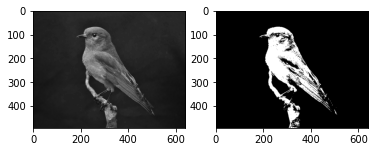

In [20]:
birdImage = cv2.imread("images/bird.jpg")
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(birdImage, cmap='gray') 

def otsuMethod(image):

    L=255 #na kok bos razdelil

    #to rabs za un del kjer racunas povprecja da ne pises for loopa pri sestevanju pa mnozenju - loh sum alpa skalarni
    # (sum(indexi[0:t] * hist[0:t]) ali np.dot(indexi[0:t],hist[0:t])
    indexiZaMnozit = np.arange(L)

    #tale je fuul bolsi, poglej dokumentacijo
    hist, bin_edges = np.histogram(image, bins=L)

    maxVar = - 1
    bestTreshold = -1

    #normaliziramo
    hist = hist / sum(hist)

    for treshold in range(0,255):
        w0 = np.sum(hist[0:treshold])
        w1 = np.sum(hist[treshold::])

        #tale je probably lepsi in hitrejsi, ampak oba delata
        # mean0 = np.dot(indexiZaMnozit[0:treshold], hist[0:treshold]) / w0
        # mean1 = np.dot(indexiZaMnozit[treshold::], hist[treshold::]) / w1
        mean0 = np.sum(indexiZaMnozit[0:treshold]*hist[0:treshold]) / w0
        mean1 = np.sum(indexiZaMnozit[treshold::]*hist[treshold::]) / w1

        interClassVar = w0 * w1 * (mean0 - mean1)**2

        if interClassVar > maxVar:
            maxVar = interClassVar
            bestTreshold = treshold
            


    return(bestTreshold)  

bestTreshold = otsuMethod(birdImage)
print(bestTreshold)

#with np.where function
birdImage = np.where(birdImage < bestTreshold, 0, 1)
plt.subplot(1,2,2)
plt.imshow(birdImage, cmap='gray')  


# Exercise 3: Morphological operations and regions


## 3.a) Morph operations

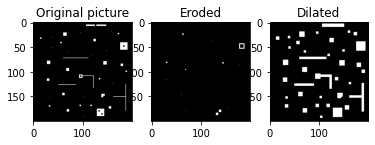

In [27]:
mask = cv2.imread('images/mask.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1) #1 vrstica, 2 stolpca, 1 pomeni da dajem zdaj sliko na prvo mesto
plt.title("Original picture")
plt.imshow(mask)

n = 5
SE = np.ones((n,n), np.uint8) # create a square structuring element
I_eroded = cv2.erode(mask, SE)
I_dilated = cv2.dilate(mask, SE)

plt.subplot(1, 3, 2)
plt.title("Eroded")
plt.imshow(I_eroded)


plt.subplot(1, 3, 3)
plt.title("Dilated")
plt.imshow(I_dilated)

plt.show()

## 3.b) Birdie cleanup

Closing - dilation and erode

Opening - erode and dilate

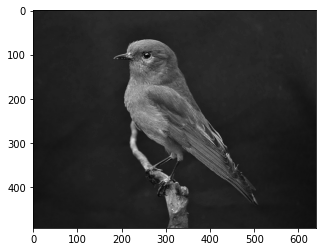

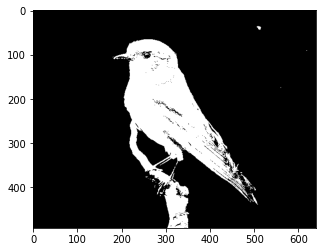

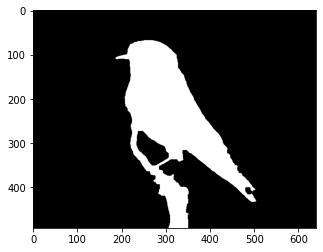

In [22]:
birdImage = cv2.imread('images/bird.jpg')
birdImage = cv2.cvtColor(birdImage, cv2.COLOR_BGR2GRAY)
plt.imshow(birdImage, cmap='gray')
plt.show()

threshold = 49

birdImage = np.where(birdImage < threshold, 0, 1)

# RABS GA DAT V uint8 !!!!
birdImage = birdImage.astype("uint8")

plt.imshow(birdImage, cmap='gray')
plt.show()

kernel = np.ones((8,8),np.uint8)

transformed = cv2.morphologyEx(birdImage, cv2.MORPH_CLOSE, kernel)

#transformed =  cv2.morphologyEx(transformed, cv2.MORPH_OPEN, kernel)

kernel = np.ones((2,2),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))


transformed =  cv2.morphologyEx(transformed, cv2.MORPH_ERODE, kernel)
transformed =  cv2.morphologyEx(transformed, cv2.MORPH_ERODE, kernel)
transformed =  cv2.morphologyEx(transformed, cv2.MORPH_ERODE, kernel)


transformed =  cv2.morphologyEx(transformed, cv2.MORPH_DILATE, kernel)
transformed =  cv2.morphologyEx(transformed, cv2.MORPH_DILATE, kernel)


plt.imshow(transformed, cmap="gray")



## 3.c) Mask
Write a functionim mask that accepts a three channel image anda binary mask and returns an image where pixel values are set to black if thecorresponding pixel in the mask is equal to0. Otherwise, the pixel value should beequal to the corresponding image pixel

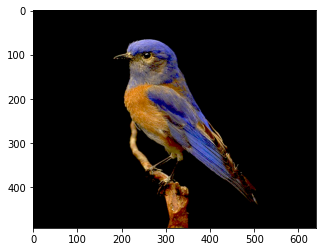

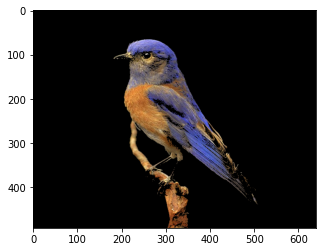

In [23]:
#3 channel image, 3 channel mask dela, js rabm 3 channel image pa 2d mask
mask = I > 60
plt.imshow(I*mask)
plt.show()

#function that accepts 3 channel image and applies a binary mask
def immask(image, mask):
    imgMask = np.copy(image)

    r,g,b = cv2.split(imgMask)
    r = r*mask
    g = g*mask
    b = b*mask

    imgMask = np.dstack((r,g,b))
    #imgMask = cv2.merge([r,g,b])

    return imgMask

#gray za 2d masko
birdImageGray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)
mask = birdImageGray > 60

imgMask = immask(I, mask)
plt.imshow(imgMask)
plt.show()



## 3.d) Mask for eagle.jpg

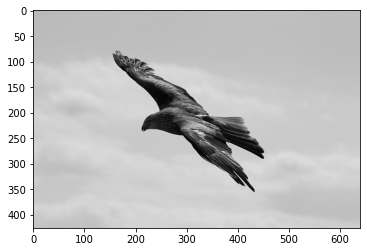

C:\Users\Luka\AppData\Local\Temp/ipykernel_13084/2173823377.py:30: RuntimeWarning: invalid value encountered in double_scalars
  mean0 = np.sum(indexiZaMnozit[0:treshold]*hist[0:treshold]) / w0


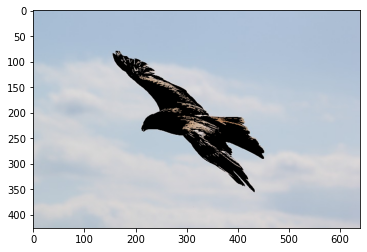

In [26]:
eagle = cv2.imread("images/eagle.jpg")
eagle = cv2.cvtColor(eagle, cv2.COLOR_BGR2RGB)
plt.imshow(eagle)

#rabmo enga v blacknwhite za 2d masko in otsu
eagleGray = cv2.cvtColor(eagle, cv2.COLOR_RGB2GRAY)
plt.imshow(eagleGray, cmap="gray")
plt.show()

mask = eagleGray > otsuMethod(eagleGray)

imgMask = immask(eagle, mask)

plt.imshow(imgMask, cmap="gray")

## 3.e) Coins connected components

(numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(binImage, connectivity=8)
- numLabels: stevilo komponent
- labels: - maske za komponento, false vse okol komponente
- stats: statistike o vseh komponentah (x-cor, y-cor, width, height, size)
- centroids: x,y coordinata sredisca

```for i in range(1, numLabels):
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]```

C:\Users\Luka\AppData\Local\Temp/ipykernel_13084/2173823377.py:30: RuntimeWarning: invalid value encountered in double_scalars
  mean0 = np.sum(indexiZaMnozit[0:treshold]*hist[0:treshold]) / w0


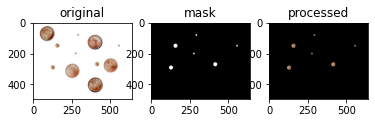

In [25]:
coins = cv2.imread("images/coins.jpg")

plt.subplot(1,3,1)
plt.title("original")
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
plt.imshow(coins)


#rabmo enga v blacknwhite za 2d masko in otsu
coinsGray = cv2.cvtColor(coins, cv2.COLOR_RGB2GRAY)

#binariziramo sliko
threshold = otsuMethod(coinsGray)
binImage = np.where(coinsGray > threshold, 0, 1)
binImage = binImage.astype("uint8")

#pocistimo, da odpravimo male dele ki so connected components, closamo
kernel = np.ones((8,8),np.uint8)
binImage = cv2.morphologyEx(binImage, cv2.MORPH_CLOSE, kernel)

(numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(binImage, connectivity=8)

#print(numLabels)
#print("labels", np.count_nonzero(labels == 4))
#print("stats", stats)
#print("cen", centroids)

#vzames zadnji stolpec od vsake komponente, ki ti pove velikost(ploscino)
#pazi, kle mas tud najvecjiga, background kt svojga, ponavad to ignoriras
velikosti = stats[:, -1]

sizeLimit = 700


mask = np.zeros(coinsGray.shape, dtype="uint8")

for i in range (0, numLabels):
    #ce je komponenta i manjsa od sizeLimita, dodamo njeno masko v celo masko
    if velikosti[i] < sizeLimit:
        componentMask = (labels == i).astype("uint8")  #lokalna maska za komponento i (lohka das tuki se *1 ali *255)
        mask = cv2.bitwise_or(mask, componentMask)     #dodamo masko za komponento na globalno, celo masko za sliko    

plt.subplot(1,3,2)
plt.title("mask")
plt.imshow(mask, cmap="gray")

processed = immask(coins, mask)

plt.subplot(1,3,3)
plt.title("processed")
plt.imshow(processed)


plt.show()
